In [ ]:
# 이미지처리에 잘 동작하는걸 cnn
# 시계열에서 잘 동작하는게 rnn > 자연어랑 이어짐..! (순환신경망)

In [1]:
# 구글 드라이브 안에 있는 파일
# 구글 드라이브의 데이터를 가져올때 항상 가져오는 라이브러리!
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Recurrent Neural Network
- Rnn하나의 섹터가 있는거고, rnn이름을 가진 알고리즘도 있는것!(신경망 이름이 rnn이기도 하고, 알고리즘이름이 rnn이기도 함!)
- 순서가 있는 비정형 데이터가. 시퀀스 데이터라고 생각하면 됨!(순서가 있는 비정형 데이터를 숫자..벡터로 표현한걸.. 시퀀스 데이터..)
- 자연어에서도 많이씀(문자에도 순서가 있다고 생각하니까..) (many to one)
- one to many(검색어 추천도.. )
- many to many(번역, Q&A)
- 대표적인 모양(xt,ht,ot) / 그림 이렇게 표현함(인풋들어가고 아웃풋나오고. 그다음 히든레이어는 위로 넘기고... >> 들어가면서 나오기도 하고 다음층으로 뭔가 보내줌. 새롭게 들어가고 뭔가 내뱉고... 새롭게 들어가고 새롭게 나오고.. >> 이게 시간적으로 가는거임(t가 늘어가는것) t가 늘수록 들어가고 나오고, 어떤 정보는 다음으로 넘어가고.. 나오고..
- input정보와 이전 히든레이어의 어떤 정보와 혼합되어서.. 아웃풋이 나옴. 이런특징 알기!
- ex) tensorflow라는 단어를 학습했음.. 그러면 얘가 그 다음 확인할거.. 에측할거를.. accuracy순이겠지?!인풋이 달라지면 아웃풋이 계속 다름!(t다음에는 e나올 가능성이 높고, e가 들어가면 n이 나올 확률이 높고..)
- 시계열도 뭐다음에 뭐가 나오는지 잘 학습해줘야!! 그 다음을 잘 예측하는게 순환신경망!!

기존신경망 vs 순환 신경망
- 기존신경망은 3 layer
- 순환신경망은 중간에 cell을 거침! 이 cell이 그 다음 cell에 어떤 정보를 넘긴다!

순환신경망 표현
- 하나의 step = 하나의 시간
- time step..(5개씩).. 순환신경망에서 데이터 표현할 때는 저러허게 표현해야 된다!(시간사이즈=window_size)

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/8_DL/time_series_data.csv', index_col = [0])
df.head()

,time,sereis
0,0.0,27.980286
1,1.0,24.258190
2,2.0,29.057243
3,3.0,34.388184
4,4.0,23.919535


- 그냥 신경망으로 regression할 수 있음. 일단 그걸로 해보자.

In [ ]:
# 파이썬 하드코드로..(시계열 데이터표현 만들어주는 scikitlearn 라이브러리 있는데 일단 그거 안쓰고 해보자)
input = []
target = []

values = df['sereis'].values
window_size = 5

for i in range(len(values) - window_size): # len(values) - window_size - 1 아님!
  x = values[i:window_size + i]
  y = values[window_size + i]
  input.append(x)
  target.append(y)

In [ ]:
df.tail()

,time,sereis
1456,1456.0,146.33182
1457,1457.0,144.18240
1458,1458.0,149.71770
1459,1459.0,146.10208
1460,1460.0,155.56927


In [ ]:
# target맞는지 결과 확인
target[-5:]

[146.33182, 144.1824, 149.7177, 146.10208, 155.56927]

In [ ]:
# 리스트로 넣어주면 안됨(모델에 넣을때 넘파이형태로 넣어줘야 함)
import numpy as np
input = np.array(input)
target = np.array(target).reshape(-1,1) # (1456,) >> (1456, 1) 이렇게 표시해주는게 좋음! 그래서 reshape. array에 '1개'가 있다는 것을 표현
print(input.shape)
print(target.shape)

(1456, 5)
(1456, 1)


In [ ]:
# train_test_split
# 시계열은 시간적인 요소를 가지고 있음. 그래서 전체에서 랜덤으로 섞으면 안됨! 
# 일단 test_size를 정함. 몇개를 예측할건지(1년단위면 1년. 월단위면 30으로 주는게 좋겠지?)
test_size = 100
split_idx = len(input) - test_size
print(split_idx)

X_train = input[:split_idx]
X_test = input[split_idx:]
y_train = target[:split_idx]
y_test = target[split_idx:]

1356


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model = Sequential()
model.add(Dense(10, input_shape = [window_size], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear')) # regression 할때는 무조건 linear!!

In [ ]:
# 성능 굿
model.compile(loss = 'mse', optimizer = 'adam')
history = model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
43/43 [==============================] - 5s 3ms/step - loss: 27259.9785
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 13851.2119
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 7255.7192
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 5355.2432
Epoch 5/20
43/43 [==============================] - 0s 3ms/step - loss: 4491.6777
Epoch 6/20
43/43 [==============================] - 0s 3ms/step - loss: 3311.6133
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 1913.7159
Epoch 8/20
43/43 [==============================] - 0s 3ms/step - loss: 737.2364
Epoch 9/20
43/43 [==============================] - 0s 3ms/step - loss: 172.5054
Epoch 10/20
43/43 [==============================] - 0s 3ms/step - loss: 51.3170
Epoch 11/20
43/43 [==============================] - 0s 3ms/step - loss: 49.8740
Epoch 12/20
43/43 [==============================] - 0s 3ms/step - loss: 49.6925
Epoch 13/20
43/43 [

In [ ]:
# 성능 안좋게 나오게 하려고 lr을 줄임 >>> 얘가 의도했던 거셨음!!!!
adam = tf.keras.optimizers.Adam(0.000001)
model.compile(loss = 'mse', optimizer = adam)
history = model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
43/43 [==============================] - 1s 3ms/step - loss: 48.8808
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 48.8802
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 48.8798
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 48.8789
Epoch 5/20
43/43 [==============================] - 0s 3ms/step - loss: 48.8782
Epoch 6/20
43/43 [==============================] - 0s 3ms/step - loss: 48.8781
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 48.8772
Epoch 8/20
43/43 [==============================] - 0s 3ms/step - loss: 48.8776
Epoch 9/20
43/43 [==============================] - 0s 3ms/step - loss: 48.8768
Epoch 10/20
43/43 [==============================] - 0s 3ms/step - loss: 48.8760
Epoch 11/20
43/43 [==============================] - 0s 4ms/step - loss: 48.8756
Epoch 12/20
43/43 [==============================] - 0s 5ms/step - loss: 48.8748
Epoch 13/20
43/43 [==================

## 모델평가

In [ ]:
model_prediction = model.predict([X_test])

4/4 [==============================] - 0s 3ms/step


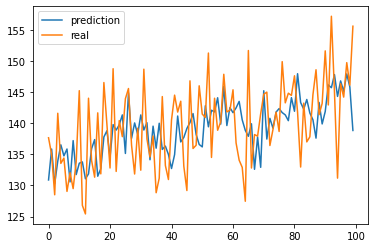

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_prediction, label = 'prediction')
plt.plot(y_test, label = 'real')
plt.legend()

- 오 생각보다 성능이 좋음 >> lr이 높아서 그런듯...하지만 잘 안되게 나와야 이후 진행하는 스토리에 맞아서 lr을 좀 줄여보겠다!

- lr 낮추니까 성능 안좋음!

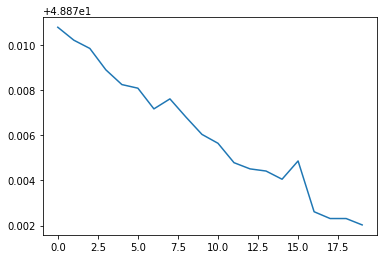

In [ ]:
plt.plot(history.history['loss']) # lr이 낮아서 이렇게 생겼는데.... 이런 loss를 바꾸려면(적게 나오게 하려면).. lr을 늘려줘야 함!!(약간 아래로 볼록한.. 수렴하도록)

# 처음에 크게 가다가 나중에는 적게가는 lr... 빨리 찾으면서도 수렴하게끔!!!! 해보자

## Learning rate가 작아서 loss가 수렴하지 못했다.
1. learning rate를 높여서 다시 학습한다.
2. learning rate를 점차 높인다.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10 ** (epoch/20)) # learning rate를 점차 높인다. / callback >> 뭐가 오면 다시 주겠다! epoch가 늘어날때마다 learning rate를 바꿔주겠다,

In [ ]:
for epoch in range(1,30):
  print(epoch, 'learning rate: ', 1e-8 * 10 ** (epoch/20))

In [ ]:
model2 = Sequential()
model2.add(Dense(10, input_shape = [window_size], activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(1, activation = 'linear')) 
adam = tf.keras.optimizers.Adam(0.000001)
model2.compile(loss = 'mse', optimizer = adam)
history2 = model2.fit(X_train, y_train, epochs = 100, callbacks = [learning_rate_callback]) # learning rate가 점점 늘어난다.

Epoch 1/100
43/43 [==============================] - 5s 3ms/step - loss: 7035.7905 - lr: 1.0000e-08
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 7035.7612 - lr: 1.1220e-08
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 7035.7324 - lr: 1.2589e-08
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 7035.7026 - lr: 1.4125e-08
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 7035.6440 - lr: 1.5849e-08
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 7035.5532 - lr: 1.7783e-08
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 7035.4609 - lr: 1.9953e-08
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 7035.3623 - lr: 2.2387e-08
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 7035.2510 - lr: 2.5119e-08
Epoch 10/100
43/43 [==============================] - 0s 4ms/step - loss: 7035.1328 - lr: 2.8184e-08

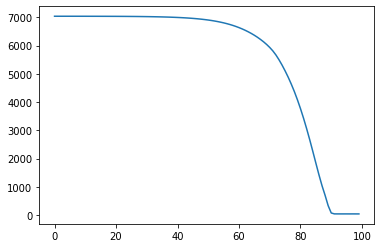

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(history2.history['loss'])), history2.history['loss']) # epoch를 100으로 했더니 loss가 한번튀었다가 다시 떨어짐

In [ ]:
# cost function -> 최소점을 찾아갈 때 lr의 역할: step(보폭)
# lr크다 = step이 크다.
# step이 너무 크다 -> 화성 간다.(lr이 너무 커서 그래프 밖으로 튐) 
# batch를 쓰는 이유! >> 이게 지금 튐.. shooting됐다!! 
# 슈팅이 필요한 이유? 로컬미니멀 빠지지 않기 위해서.. '글로벌 미니멈을 찾기 위해서!'
# 그럼 이 위에 그래프 문제를 해결하려면 어떻게 해야 할까? 
# epoch수를 줄이거나 / step의 크기를 줄이거나! >> 우리는 step을.. lr을 좀만 올려줘보자!

## 근데..잘나오는뎅..흠

# callback을 통해서 lr를 튜닝..???!?! 맞나..

In [ ]:
y_pred = model2.predict(X_test)

4/4 [==============================] - 0s 3ms/step


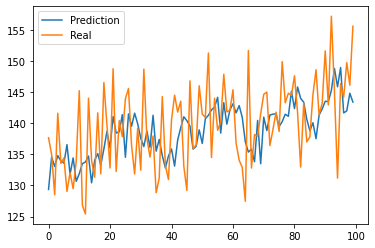

In [ ]:
plt.plot(y_pred, label = 'Prediction')
plt.plot(y_test, label = 'Real')
plt.legend()

## Hyperparameter Tuning
- 모델을 만들때 인간이 해줘야, 지정해줘야 하는 값들.(변경할수있는, 지정할 수 있는..이런것보다는)

In [ ]:
!pip install keras-tuner

In [ ]:
# keras tuner를 활용하여 model을 만들기 위한 builder

# dense층의 layer 개수를 수정 -> 어디서부터 어디까지(10~30)
# lr값을 수정 -> 어디서부터 어디까지(0.001 ~ 0.005)
# builder : 위의 정보를 포함하는 것

def model_builder(hp): # 이 함수를 실행시킬 때마다 model이 나옴!(return model)
  model = Sequential()
  layer_units = hp.Int('units', min_value = 10, max_value = 30, step = 2) # 첫줄..dense층에 들어가는 숫자(10..) >> 이게 units임!! / unit에 대한 객체를 만들어줌. 아래줄에 모델에 그 해당 객체를 넣어주면 됨.
  model.add(Dense(layer_units, activation = 'relu', input_shape = [window_size]))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(1, activation = 'linear'))
  model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(''))
  return model

In [ ]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(model_builder,
                     objective='loss', max_trials = 150,
                     executions_per_trial = 3, directory ='dir',
                     project_name = 'search_hp', overwrite = True)

In [ ]:
# tuner.search(X_train, y_train, epochs = 30, verbose=0) # 출력값 안나옴
tuner.search(X_train, y_train, epochs = 30)

In [ ]:
tuner.results_summary()

In [ ]:
best_models = tuner.get_best_models(num_models = 4)

In [ ]:
model = best_models[0]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.plot(y_pred, label = 'Prediction')
plt.plot(y_test, label = 'Real')
plt.legend()